In [1]:
from conjugate_priors import ConjugateNormalInverseGamma
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

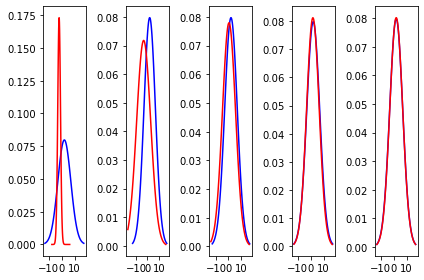

In [2]:
oracle_mean = 2.0
oracle_std = 5.0
data_points = 10000
eval_points = [1, 10, 100, 1000, 10000]

ng = ConjugateNormalInverseGamma(mu_0=0., alpha_0=1.0, beta_0=1.0, kappa_0=1.0)
np.random.seed(1337)

data = np.random.normal(oracle_mean, oracle_std, size=data_points+1)
data2 = []
i = 0
fig, ax = plt.subplots(ncols=len(eval_points))
for d in data:
    ng.update(d)
    i += 1
    if i in eval_points:
        dist = ng.marginal()
        x = np.linspace(oracle_mean - 3*oracle_std, oracle_mean + 3*oracle_std, 100)
        ax[eval_points.index(i)].plot(x, stats.norm.pdf(x, oracle_mean, oracle_std), color="blue")
        x2 = np.linspace(dist.mean() - 3*dist.std(), dist.mean() + 3*dist.std(), 100)
        ax[eval_points.index(i)].plot(x2, stats.norm.pdf(x, dist.mean(), dist.std()), color="red")
plt.tight_layout()
plt.savefig("normal_estimation.pdf", bbox_inches="tight")
